In [1]:
from sklearn.datasets import make_blobs
import torch
from torch.utils.data import DataLoader, TensorDataset
import random
import math
from label_prop_arm import LabelProp
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import utilities
import pandas as pd
import test_arm
import matplotlib.pyplot as plt

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
X, y = make_blobs(n_samples = 500, n_features = 20000, centers = 3, random_state=8)
random.seed(8)
subset = random.sample(range(len(y)), math.floor((len(y)*.8)))
masked_y = np.copy(y)
masked_y[subset] = -1
pca = PCA(n_components=500, random_state=8)
X = pca.fit_transform(X)

In [4]:
X, y = make_blobs(n_samples = 500, n_features = 20000, centers = 3, random_state=8)
utilities.preprocess(X)
utilities.mask_labels(y, .8)

/Users/daniel/Desktop/conradLab/thesis/scMARM/utilities.py:38: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(data)
/Users/daniel/miniconda3/envs/thesis/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [3]:
train_dataset = TensorDataset(torch.tensor(X), torch.tensor(masked_y))
test_dataset = TensorDataset(torch.tensor(X), torch.tensor(y))
train_dataloader = DataLoader(train_dataset, batch_size=90, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=90, shuffle=False)

In [4]:
test_arm = LabelProp("configs/semi_basic.txt", 10)

In [14]:
test_arm.train(train_dataloader, epochs=1)

Loss in epoch 0 = 0.201539


In [11]:
test_arm.reset()

In [6]:
accuracy, cm = test_arm.validation_metrics(test_dataloader)

/Users/daniel/Desktop/conradLab/thesis/scMARM/label_prop_arm.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  equality = (torch.tensor(real_y) == final_pred)


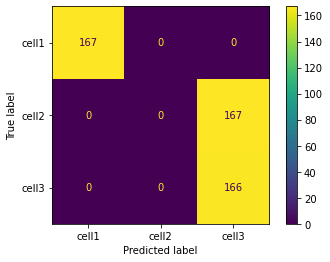

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(["cell1", "cell2", "cell3"]))
disp.plot()

In [2]:
test_data = pd.read_csv("simulations/splat_0.4_de/counts.csv", index_col=0)
test_meta = pd.read_csv("simulations/splat_0.4_de/meta.csv", index_col=0)

In [3]:
X = np.array(test_data)
y = pd.factorize(test_meta['Group'], sort=True)[0]

In [6]:
datasets = [(X,y)]
maskings = [.8, .9]
arm = LabelProp("configs/semi_basic.txt", 10)
results = test_arm.test_label_prop(datasets, maskings, arm, epochs=2)

/var/folders/zj/m7t63tn57zj6156pfxpr2bhw0000gn/T/ipykernel_61188/1691892834.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset_results = np.array(dataset_results)


0.8
0.5339999794960022
0.9
0.4490000009536743


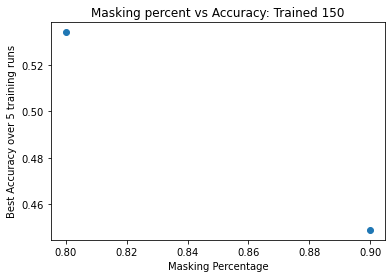

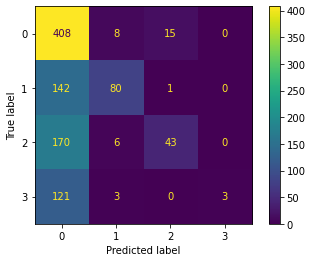

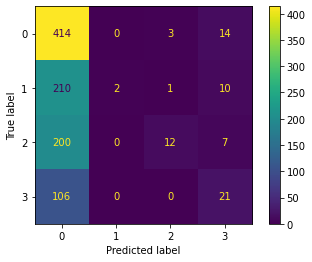

In [14]:
for dataset_results in results:
    dataset_results = np.array(dataset_results)
    
    plt.scatter(dataset_results[:,0], dataset_results[:,1])
    plt.xlabel("Masking Percentage")
    plt.ylabel("Best Accuracy over 5 training runs")
    plt.title("Masking percent vs Accuracy: Trained 150")
    for masking in dataset_results:
        print(masking[0])
        print(masking[1])
        disp = ConfusionMatrixDisplay(confusion_matrix=masking[2])
        disp.plot()

In [123]:
test_data = pd.read_csv("/home/groups/ConradLab/daniel/GNN_cell_annotation/data/klein/klein_norm.csv", index_col=0)
test_meta = pd.read_csv("/home/groups/ConradLab/daniel/GNN_cell_annotation/data/klein/klein_ann.csv", index_col=0)

In [124]:
test_data.shape

(2717, 24175)

In [125]:
test_data = np.array(test_data)
test_meta = np.array(test_meta)

In [126]:
y=pd.factorize(test_meta[:,0])[0]

In [127]:
pca = PCA(n_components=500, random_state=8)
X = pca.fit_transform(test_data)

In [128]:
y, masked_y = utilities.mask_labels(y, .9)

In [129]:
masked_y[1:20]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1])

In [130]:
train_dataset = TensorDataset(torch.tensor(X), torch.tensor(masked_y))
test_dataset = TensorDataset(torch.tensor(X), torch.tensor(y))
train_dataloader = DataLoader(train_dataset, batch_size=90, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=90, shuffle=False)

In [131]:
test_arm = LabelProp("configs/semi_basic_linear.txt", 2)

In [132]:
test_arm.reset()
test_arm.train(train_dataloader, epochs=150)

Loss in epoch 0 = 31.587341
Loss in epoch 10 = 0.567747
Loss in epoch 20 = 0.029819
Loss in epoch 30 = 0.011743
Loss in epoch 40 = 0.006173
Loss in epoch 50 = 0.003551
Loss in epoch 60 = 0.002414
Loss in epoch 70 = 0.001605
Loss in epoch 80 = 0.001103
Loss in epoch 90 = 0.000895
Loss in epoch 100 = 0.000808
Loss in epoch 110 = 0.000489
Loss in epoch 120 = 0.000420
Loss in epoch 130 = 0.000361
Loss in epoch 140 = 0.000256


In [133]:
accuracy, cm = test_arm.validation_metrics(test_dataloader)
print(accuracy)

0.9922708868980408


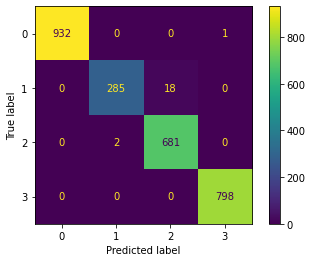

In [134]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [116]:
test_data = pd.read_csv("simulations/splat_0.3_de/counts.csv", index_col=0)
test_meta = pd.read_csv("simulations/splat_0.3_de/meta.csv", index_col=0)

In [59]:
test_data.shape

(1000, 20000)

In [117]:
X = np.array(test_data)
y = pd.factorize(test_meta['Group'], sort=True)[0]
X = utilities.preprocess(X, scale=False)
y, masked_y = utilities.mask_labels(y, .8)

In [61]:
y.shape

(1000,)

In [118]:
train_dataset = TensorDataset(torch.tensor(X), torch.tensor(masked_y))
test_dataset = TensorDataset(torch.tensor(X), torch.tensor(y))
train_dataloader = DataLoader(train_dataset, batch_size=35, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=35, shuffle=False)

In [119]:
test_arm = LabelProp("configs/semi_basic_linear.txt", 2)

In [120]:
test_arm.train(train_dataloader, epochs=200)

Loss in epoch 0 = 38.601715
Loss in epoch 10 = 0.250233
Loss in epoch 20 = 0.043882
Loss in epoch 30 = 0.018387
Loss in epoch 40 = 0.010451
Loss in epoch 50 = 0.005694
Loss in epoch 60 = 0.003763
Loss in epoch 70 = 0.003165
Loss in epoch 80 = 0.002175
Loss in epoch 90 = 0.001587
Loss in epoch 100 = 0.001178
Loss in epoch 110 = 0.000882
Loss in epoch 120 = 0.000677
Loss in epoch 130 = 0.000682
Loss in epoch 140 = 0.000603
Loss in epoch 150 = 0.000428
Loss in epoch 160 = 0.000411
Loss in epoch 170 = 0.000304
Loss in epoch 180 = 0.000237
Loss in epoch 190 = 0.000240


In [121]:
accuracy, cm = test_arm.validation_metrics(test_dataloader)
print(accuracy)

0.9139999747276306


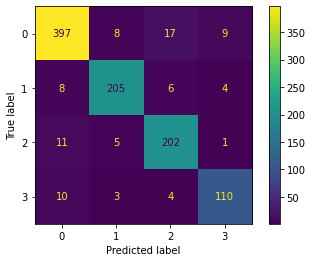

In [122]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()